# Explore here

Index(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type', 'uri'],
      dtype='object')
                              name  popularity  duration_ms
0                        One Dance          82       173986
1                         She Will          75       305840
2  WAIT FOR U (feat. Drake & Tems)          80       189893
3                       God's Plan          79       198973
4                     Passionfruit          79       298940
5                      GIMME A HUG          78       193054
6                         CN TOWER          78       241889
7                            NOKIA          78       241023
8    Jimmy Cooks (feat. 21 Savage)          78       218364
9                        Headlines          77       235986


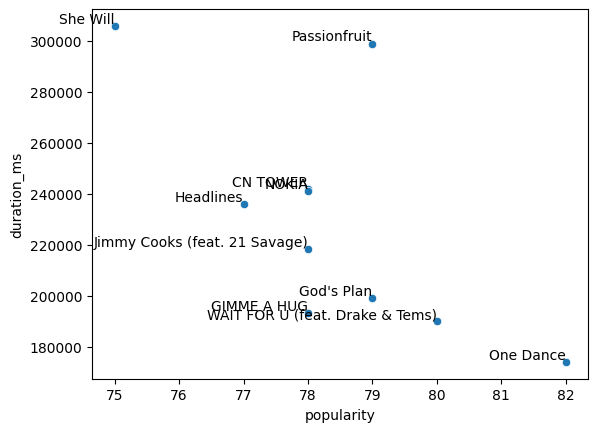

In [67]:
import os
import pandas as pd
from dotenv import load_dotenv
import spotipy
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from spotipy.oauth2 import SpotifyClientCredentials
load_dotenv()


client_id = "33d536d3494b4f71a207772643b75b82"
client_secret = "323a434b603c4722bb860a4d47273155"
Drake_id = "3TVXtAsR1Inumwj472S9r4"
Drake_url = "spotify:artist:3TVXtAsR1Inumwj472S9r4"

spotify = spotipy.Spotify(oauth_manager=SpotifyClientCredentials(client_id = client_id,client_secret = client_secret))
results = spotify.artist_top_tracks(Drake_url)
if results:
    tracks = results['tracks']
tracks

tabla = pd.DataFrame(tracks)
tabla

columnas = tabla.columns
print(columnas)

top_3 = tabla.head(3)
top_3

popularidad = tabla[['name','popularity', 'duration_ms']]
print(popularidad)

mas_populares = popularidad.sort_values('duration_ms', ascending = False)
mas_populares

top_3 = mas_populares.head(3)
top_3


for i in range(len(mas_populares)):
    plt.text(mas_populares['popularity'].iloc[i], 
             mas_populares['duration_ms'].iloc[i], 
             mas_populares['name'].iloc[i], 
             fontsize=10, ha='right', va='bottom', color='black')

scatter_plot = sns.scatterplot(data = mas_populares, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")
plt.show()

